In [ ]:
import math

from win32comext.internet.inetcon import FIEF_FLAG_SKIP_INSTALLED_VERSION_CHECK

# linear movement
#  T = exposure time
#  v = velosity (assume fixed velocity in short exp time)
d_x = v*T
# we want to know the number of pixels

 # M - optic magnification
 # optic magnification =
 # f - focal length
 # P - pixel size
 # Z - distance from the lens to the sensor
 # w - angular velocity
 # d_p - pixel displacement

def calc_d_p(f,T,P,v,Z,w):
    return f*T/P ( v/Z +w)

#  we assume that there is no angular velocity
#  we will assume the bluring process is LSI(fixed for all pixels) and linear
#  Thereforew we can assume that the bluring process is a convolution with a fixed kernel
d_p = calc_d_p(f,T,P,v,Z,w)
K(x,y) = 1/d_p * math.exp(-x/d_p)

#  every liner process fixed in place can be modeled as a convolution system and we will be able to model the image
b = I * K

#  I = wanted image
#  b = blurred image
#  K = convolution kernel
#  therefore our problem is deconvolution we will do the process in the frequency domain because it is faster

b = I*K + n
#  n is the noise
#  we will use the Wiener filter to solve the problem

I = F_inv(B*K / |k|**2 + sigma)

#  sigma  = SNR
#  B = fourier transform of the blurred image
#  K = fourier transform of the kernel
#  |k|**2 = fourier transform of the kernel squared
#  I = fourier transform of the wanted image
#  F_inv = inverse fourier transform



In [12]:
# Define the parameters
f =  50e-3 # example focal length in m
T = 0.1  # example exposure time in seconds
P = 12e-6  # example pixel size in m
v = 0.5  # example velocity in m/s
Z = 0.5  # example distance from lens to sensor in mm
w = 0  # assuming no angular velocity
K_value = 0.01  # example K value for Wiener filter
calc_d_p(f, T, P, v, Z, w)


416.66666666666674

[[0.16487213 0.12840254 0.1        0.07788008 0.06065307]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [172 172 172 ...  95  95  95]
 ...
 [166 163 159 ...  41  44  44]
 [165 163 159 ...  41  43  44]
 [165 161 158 ...  41  44  44]]
blured [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [172 172 172 ...  95  95  95]
 ...
 [166 163 159 ...  41  44  44]
 [165 163 159 ...  41  43  44]
 [165 161 158 ...  41  44  44]]
deblured [[ 1.39994121e+01 -3.99214960e+00  3.66285886e+00 ...  1.07952795e+00
   3.30378501e+00 -1.47965504e+01]
 [ 2.66251263e-09  2.99928450e-09  1.22679847e-09 ...  2.57487749e-10
  -1.34418546e-09 -2.52314664e-09]
 [ 1.22417732e+02  6.52611953e+01  5.96357473e+01 ...  3.78233778e+01
   3.83873707e+01  4.37660840

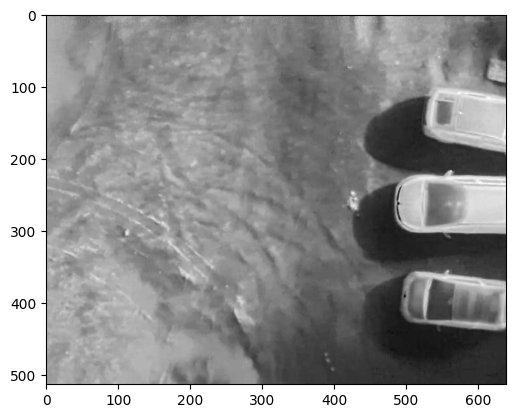

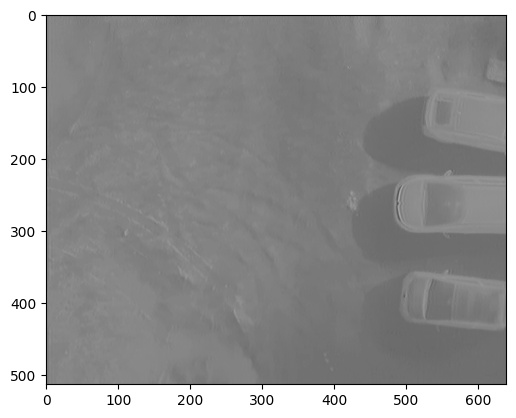

In [120]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from numpy.fft import fft2, ifft2

def wiener_filter(blurred, kernel, K):
    # Normalize the kernel
    kernel /= np.sum(kernel)

    # Perform Fourier transforms
    blurred_fft = fft2(blurred)
    kernel_fft = fft2(kernel, s=blurred.shape)

    # Apply the Wiener filter
    kernel_fft_conj = np.conj(kernel_fft)
    denominator = (np.abs(kernel_fft) ** 2 + K)
    wiener_filter = kernel_fft_conj / denominator
    deblurred_fft = blurred_fft * wiener_filter

    # Perform the inverse Fourier transform
    deblurred = ifft2(deblurred_fft)

    # Return the real part of the result
    return np.abs(deblurred)

def weiner2(blurred, kernel, K):
    blurred = np.float64(blurred) #ensure floating point
    kernel = np.float64(kernel)
    kernel /= np.sum(kernel)

    blurred_fft = fft2(blurred)
    kernel_fft = fft2(kernel, s=blurred.shape)

    kernel_fft_conj = np.conj(kernel_fft)
    denominator = (np.abs(kernel_fft) ** 2 + K)
    XX = kernel_fft_conj / denominator
    deblurred_fft = blurred_fft * XX

    deblurred = np.real(ifft2(deblurred_fft)) #using real part.

    return deblurred

def calc_d_p(f, T, P, v, Z, w):
    return f * T / P * (v / Z + w)



# Load the blurred thermal image
image_path = r'thermi/images/img_0.png'  # Change this to the path of your image
# image_path = r'C:\Users\User\Downloads\image1.png'
blurred_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# Calculate the pixel displacement
d_p = calc_d_p(f, T, P, v, Z, w)
d_p = 10
# Create a convolution kernel
size = int(2 * d_p + 1)
size = 5
# K(x,y) = 1/d_p * math.exp(-x/d_p)
# kernel = np.exp(-np.linspace(-d_p, d_p, size) ** 2 / (2 * d_p ** 2))
kernel = 1/d_p * np.exp(-np.linspace(-size,size, size)/d_p)
kernel = np.full((size, size), kernel)# kernel = np.outer(kernel, kernel)  # Create a 2D Gaussian kernel
kernel[1:,:] = 0
print(kernel)
# Deblur the image
print(blurred_image)
deblurred_image = weiner2(blurred_image, kernel, K_value)

# # Save and display the deblurred image
# cv2.imwrite('deblurred_image.jpg', deblurred_image)
# cv2.imshow('blurred_image', blurred_image)
# cv2.waitKey(0)
# cv2.imshow('Deblurred Image', deblurred_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
print("blured", blurred_image)
print("deblured" , deblurred_image/640 *255)
plt.imshow(blurred_image, cmap='gray')
plt.show()
plt.imshow(deblurred_image, cmap='gray')
plt.show()


In [ ]:

import os
import cv2

import numpy as np
import matplotlib.pyplot as plt

def read_boson_img(file, flip=[''], num = 0):
    # extract filename from file
    filename = os.path.split(file)[-1]
    # read tiff file (16 bit)
    img = cv2.imread(file, cv2.IMREAD_ANYDEPTH)
    # flip image if required
    if 'h' in flip or 'H' in flip:
        img = np.fliplr(img)
    if 'v' in flip or 'V' in flip:
        img = np.flipud(img)
    # convert img to temperature [°C]
    tmp = img / 100 - 273

    # calculate median and std values for image
    mT = np.median(tmp)
    sT = np.std(tmp)

    # plot thermal image
    plt.figure()
    plt.imshow(tmp, cmap='gray', vmin=mT - 2.5 * sT, vmax=mT + 2.5 * sT)
    print("tmp", tmp)


    vmin = mT - 2.5 * sT
    vmax = mT + 2.5 * sT
    # Clip the pixel values to the range [vmin, vmax]
    clipped_image = np.clip(tmp, vmin, vmax)
    # Normalize the image to the range [0, 255]
    normalized_image = ((clipped_image - vmin) / (vmax - vmin) * 255).astype(np.uint8)
    cv2.imwrite(f'blurred_image_{num}.jpg', normalized_image)
    print(normalized_image, normalized_image.min(), normalized_image.max())

    plt.title('Temp. ($\epsilon$ = 0.95) [°C] : ' + filename)
    plt.show()

    return img, tmp


if __name__ == '__main__':

    filepath = r'C:\Users\User\Downloads\ThermalMotion'
    # filepath = r'C:\Users\USER\Ilya\SecCamera\Thermal'
    # 28-41
    for i in range(28, 42):
        filename = f'Boson_Capture{i}'
        filetype = 'tiff'
        file = os.path.join(filepath, filename + '.' + filetype)
        read_boson_img(file, ['H', 'V'], i)


In [148]:
import scipy.io
import numpy as np
import cv2
from PIL import Image

# Load the .mat file
mat_file = scipy.io.loadmat(r'C:\Users\User\PycharmProjects\PythonProject\DeepIR\test3_sim_dip_8x_20.mat')
print(mat_file.keys())
# 'gt', 'rec', 'gain'
# Access the image data from the .mat file
# Assuming the image data is stored in a variable named 'image'
image_data = mat_file['rec']

# Normalize the image data to the range [0, 255]
normalized_image = cv2.normalize(image_data, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
normalized_image = normalized_image.astype(np.uint8)

# Save the image using OpenCV
# cv2.imwrite('deblur_deepir_40.png', normalized_image)
colored_image = cv2.applyColorMap(normalized_image, cv2.COLORMAP_INFERNO)

cv2.imshow('Deblurred Image', normalized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


print("Image saved successfully.")


dict_keys(['__header__', '__version__', '__globals__', 'gt', 'rec', 'gain', 'offset', 'snr', 'psnr', 'ssim', 'minval', 'maxval'])
Image saved successfully.


In [163]:
import cv2

def find_and_draw_edges(image_path, name):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if image is loaded successfully
    if image is None:
        print("Error: Could not load image.")
        return

    # Find edges using Canny edge detection
    edges = cv2.Canny(image, 100, 200)

    # Draw edges on the original image (in color)
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    color_image[edges != 0] = [0, 0, 255]  # Red color for edges

    # Display the original image and edges
    # cv2.imwrite(name, color_image)
    cv2.imshow('Image with Edges', color_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return colored_image

# Example usage
image_path = r'/thermi/images/blurred_image_40.jpg'
im1 = find_and_draw_edges(image_path, "original_with_edges2.jpg")
image_path2 = r'C:\Users\User\PycharmProjects\PythonProject\Deblur\thermi\deblurred_image_40_check_2dkernel_20.jpg'
im2= find_and_draw_edges(image_path2, "deblured_with_edges2.jpg")
np.hstack((im1, im2))
cv2.imwrite("edges_detections.jpg", np.hstack((im1, im2)))



True

In [3]:
"""
this script read thermal image captured by Boson camera in 16 bit
it flips it if required, and converts it to temperature in °C.
it plots the thermal image, returns the raw data and temperature.
"""
import os
import cv2

import numpy as np
import matplotlib.pyplot as plt

def read_boson_img(file, flip=['']):
    # extract filename from file
    filename = os.path.split(file)[-1]
    # read tiff file (16 bit)
    img = cv2.imread(file, cv2.IMREAD_ANYDEPTH)
    # flip image if required
    if 'h' in flip or 'H' in flip:
        img = np.fliplr(img)
    if 'v' in flip or 'V' in flip:
        img = np.flipud(img)
    # convert img to temperature [°C]
    tmp = img / 100 - 273

    # calculate median and std values for image
    mT = np.median(tmp)
    sT = np.std(tmp)

    vmin = mT - 2.5 * sT
    vmax = mT + 2.5 * sT
    # Clip the pixel values to the range [vmin, vmax]
    clipped_image = np.clip(tmp, vmin, vmax)
    # Normalize the image to the range [0, 255]
    normalized_image = ((clipped_image - vmin) / (vmax - vmin) * 255).astype(np.uint8)

    # plot thermal image
    # plt.figure()
    # plt.imshow(tmp, cmap='gray', vmin=mT - 2.5 * sT, vmax=mT + 2.5 * sT)
    # # coords=plt.ginput(3, 30, True)
    # # print(coords)
    # plt.title('Temp. ($\epsilon$ = 0.95) [°C] : ' + filename)
    # plt.show()
    cv2.imshow("img", normalized_image)
    cv2.waitKey(0)

    return normalized_image


if __name__ == '__main__':

    filepath = r'D:\ThermalMotion\\'
    for file in os.listdir(r'D:\ThermalMotion\\'):
        if file.endswith(".tiff"):
            num = filename.split('_')[-1].split('.')[0]
            filename = os.path.join(filepath, file)
            img = read_boson_img(filename, ['H', 'V'])
            cv2.imwrite(f'blurred_image_{num}.jpg', img)
            print(filename, num)

    cv2.destroyAllWindows()

D:\ThermalMotion\\Boson_Capture42.tiff Capture55
D:\ThermalMotion\\Boson_Capture43.tiff Capture42
D:\ThermalMotion\\Boson_Capture44.tiff Capture43
D:\ThermalMotion\\Boson_Capture45.tiff Capture44
D:\ThermalMotion\\Boson_Capture46.tiff Capture45
D:\ThermalMotion\\Boson_Capture47.tiff Capture46
D:\ThermalMotion\\Boson_Capture48.tiff Capture47
D:\ThermalMotion\\Boson_Capture49.tiff Capture48
D:\ThermalMotion\\Boson_Capture50.tiff Capture49
D:\ThermalMotion\\Boson_Capture51.tiff Capture50
D:\ThermalMotion\\Boson_Capture52.tiff Capture51
D:\ThermalMotion\\Boson_Capture53.tiff Capture52
D:\ThermalMotion\\Boson_Capture54.tiff Capture53
D:\ThermalMotion\\Boson_Capture55.tiff Capture54
D:\ThermalMotion\\Boson_Capture56.tiff Capture55
D:\ThermalMotion\\Boson_Capture_2.tiff Capture56
D:\ThermalMotion\\Boson_Capture_21.tiff 2
D:\ThermalMotion\\Boson_Capture_210.tiff 21
D:\ThermalMotion\\Boson_Capture_211.tiff 210
D:\ThermalMotion\\Boson_Capture_212.tiff 211
D:\ThermalMotion\\Boson_Capture_213.tiff

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from numpy.fft import fft2, ifft2
import os
import time

def wiener_filter(blurred, kernel, K):
    # Normalize the kernel
    kernel /= np.sum(kernel)
    # Perform Fourier transforms
    blurred_fft = fft2(blurred)
    kernel_fft = fft2(kernel, s=blurred.shape)


    # Apply the Wiener filter
    kernel_fft_conj = np.conj(kernel_fft)
    denominator = (np.abs(kernel_fft) ** 2 + K)
    wiener_filter = kernel_fft_conj / denominator
    deblurred_fft = blurred_fft * wiener_filter

    # Perform the inverse Fourier transform
    deblurred = ifft2(deblurred_fft)

    # Return the real part of the result
    return np.abs(deblurred)

def calc_d_p(f, T, P, v, Z, w):
    return f * T / P * (v / Z + w)

def find_and_draw_edges(image):
    # Find edges using Canny edge detection
    edges = cv2.Canny(image, 100, 200)

    # Draw edges on the original image (in color)
    color_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    color_image[edges != 0] = [0, 0, 255]  # Red color for edges

    # Display the original image and edges
    # cv2.imshow('Image with Edges', color_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return color_image


def deblur(blurred_image):

    start = time.time_ns()
    # flip image if required
    blurred_image = np.fliplr(blurred_image)
    blurred_image = np.flipud(blurred_image)
    f = 18e-3 #TODO: find the value
    T = 1/60 #TODO: find the value
    P = 15e-6#TODO: find the value
    K_value = 0.005 #0.01
    w=0

    v = 6 #TODO: find the value
    Z = 3 #TODO: find the value
    # Calculate the pixel displacement
    d_p = calc_d_p(f, T, P, v, Z, w)
    print("d_p: ", d_p)
    d_p = 3
    # d_p = 20
    # Create a convolution kernel
    # size = int(d_p + 2) #TODO: find the value
    size = 10

    # K(x,y) = 1/d_p * math.exp(-x/d_p)
    # k(x,y) = 10/d_p**2 *np.exp(-(x/d_p + y/(0.1*d_p)))

    #option 1: x is positive
    # kernel = 1/d_p * np.exp(-np.arange(1,size+1)/d_p)


    # option 2: having 2 dim repeating lines
    # kernel = 1/d_p * np.exp(-np.linspace(-size,size, size)/d_p)
    # kernel = np.full((size, size), kernel)


    # Option 3: Create a 2D  kernel changing on x and y
    x = np.arange(size).reshape(size, 1)  # Column vector of shape (n, 1)
    y = np.arange(size).reshape(1, size)  # Row vector of shape (1, m)
    # Compute the matrix using broadcasting
    kernel = (10 / d_p**2) * np.exp(-x / d_p + y / (0.1 * d_p))

    # option 4: having 1 dim only
    # kernel[1:,:]=  0 #todo understand whats better


    # print(kernel)
    # Deblur the image
    deblurred_image = wiener_filter(blurred_image, kernel, K_value)

    # Normalize the 16-bit image to the range [0, 1]
    #
    # print(normalized_image.min(), normalized_image.max())
    # Convert the normalized image to 8-bit format by scaling to the range [0, 255]
    # image_8bit = cv2.convertScaleAbs(normalized_image, alpha=(255.0))
    # Save and display the deblurred image
    # convert img to temperature [°C]
    # normalized_image = (tmp - tmp.min()) / (tmp.max() - tmp.min())
    # # calculate median and std values for image

    # norm_img = cv2.normalize(normalized_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    # norm_img = norm_img.astype(np.uint8)

    # cv2.imwrite(f'deblurred_image_{num}_check1.jpg',norm_img)
    # print(normalized_image, normalized_image.min(), normalized_image.max())
    tmp = deblurred_image / 100 - 273

    mT = np.median(tmp)
    sT = np.std(tmp)
    vmin = mT - 2.5 * sT
    vmax = mT + 2.5 * sT
    # Clip the pixel values to the range [vmin, vmax]
    clipped_image = np.clip(tmp, vmin, vmax)
    # Normalize the image to the range [0, 255]
    normalized_image = ((clipped_image - vmin) / (vmax - vmin) * 255).astype(np.uint8)
    print("time", (time.time_ns() - start)/1000000)
    print(normalized_image.min(), normalized_image.max())


    tmp_b = blurred_image / 100 - 273
    clipped_blurred = np.clip(tmp_b, vmin, vmax)
    # Normalize the image to the range [0, 255]
    normalized_blurred = ((clipped_blurred - vmin) / (vmax - vmin) * 255).astype(np.uint8)
    return normalized_image, normalized_blurred




if __name__ == '__main__':
    # for num in range(9):
    # for num in range(40,41):
    i=0
    # for file in os.listdir(r'D:\ThermalMotion\\'):
    # filename = os.path.join(r'D:\ThermalMotion\\', file)
    # for filename in os.listdir(r'D:\ThermalMotion\\'):
    #     if filename.endswith(".tiff"):
    # filename = os.path.join(r'D:\ThermalMotion\\', filename)
    video_path =r"D:\thermi\Boson_Capture_6.avi"
    cap = cv2.VideoCapture(video_path)
        # Check if the video was opened successfully
    if not cap.isOpened():
        print("Error: Could not open video file.")
        exit()

    # num = filename.split('_')[-1].split('.')[0]
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter("therm_1.avi", fourcc, 20, (1024, 640))

    while True:
        # Read a frame from the video
        ret, frame = cap.read()
        # If the frame was not read successfully, break the loop
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        normalized_image, normalized_blurred = deblur(frame)
        cv2.imshow("img", np.hstack([ normalized_image, normalized_blurred]))
        cv2.waitKey(1)
        # cv2.imshow("edges", np.hstack([enhance_edges(normalized_blurred), enhance_edges(normalized_image)]))
        out.write(np.hstack([ normalized_image, normalized_blurred]))

    cv2.destroyAllWindows()
    cap.release()
    cv2.destroyAllWindows()



d_p:  39.99999999999999
time 52.0015
8 255
d_p:  39.99999999999999
time 57.9999
8 255
d_p:  39.99999999999999
time 61.9974
8 255
d_p:  39.99999999999999
time 57.001
9 255
d_p:  39.99999999999999
time 57.0023
8 255
d_p:  39.99999999999999
time 75.002
8 255
d_p:  39.99999999999999
time 94.9997
7 255
d_p:  39.99999999999999
time 73.9977
7 255
d_p:  39.99999999999999
time 59.9999
6 255
d_p:  39.99999999999999
time 51.0238
6 255
d_p:  39.99999999999999
time 52.3464
6 255
d_p:  39.99999999999999
time 57.9978
7 255
d_p:  39.99999999999999
time 54.0065
7 255
d_p:  39.99999999999999
time 51.0008
8 255
d_p:  39.99999999999999
time 50.9994
8 255
d_p:  39.99999999999999
time 48.0003
8 255
d_p:  39.99999999999999
time 47.9984
7 255
d_p:  39.99999999999999
time 51.028
8 255
d_p:  39.99999999999999
time 47.9721
7 255
d_p:  39.99999999999999
time 46.9961
6 255
d_p:  39.99999999999999
time 46.9992
6 255
d_p:  39.99999999999999
time 45.0313
6 255
d_p:  39.99999999999999
time 51.0027
5 255
d_p:  39.99999

In [3]:
import cv2
import numpy as np

def enhance_edges(image): #, output_path):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Use the Sobel operator to find edges
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)

    # Normalize the edges image to the range [0, 255]
    sobel_edges = cv2.normalize(sobel_edges, None, 0, 255, cv2.NORM_MINMAX)
    # Convert edges image to uint8
    sobel_edges = np.uint8(sobel_edges)
    # Save the edges image
    # cv2.imwrite(output_path, sobel_edges)
    # Display the original image and the edges
    # cv2.imshow('Enhanced Edges', sobel_edges)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return sobel_edges

# Example usage
image_path = r'D:\thermi\Boson_Capture_34.jpeg'
# output_path = 'path/to/save/enhanced_edges.jpg'
enhance_edges(image_path) #, output_path)


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'GaussianBlur'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


[0.09048374 0.08187308 0.07408182 0.067032   0.06065307]
10 [[0.86666667 0.8627451  0.8627451  ... 0.82745098 0.82745098 0.82745098]
 [0.74901961 0.75294118 0.75294118 ... 0.72156863 0.72156863 0.7254902 ]
 [0.76862745 0.77254902 0.77254902 ... 0.74117647 0.74117647 0.74901961]
 ...
 [0.08627451 0.08627451 0.08627451 ... 0.52941176 0.45098039 0.55294118]
 [0.09019608 0.09019608 0.08627451 ... 0.57647059 0.58039216 0.52941176]
 [0.09019608 0.09019608 0.08627451 ... 0.60392157 0.52156863 0.42745098]] [[ 0.34073205  0.29365028  0.26291875 ...  0.41676023  0.40175917
   0.37816156]
 [ 0.45307294  0.46000618  0.4684365  ...  0.42115494  0.42790693
   0.44223524]
 [ 0.54479991  0.58636484  0.61584874 ...  0.43657318  0.46127721
   0.50071382]
 ...
 [ 0.00778866 -0.14936518 -0.28315715 ...  0.28068108  0.22646257
   0.12732548]
 [ 0.13534317  0.00430228 -0.10132622 ...  0.37781003  0.33092238
   0.24242095]
 [ 0.25372523  0.16124273  0.09152136 ...  0.42399373  0.39185207
   0.33156796]]


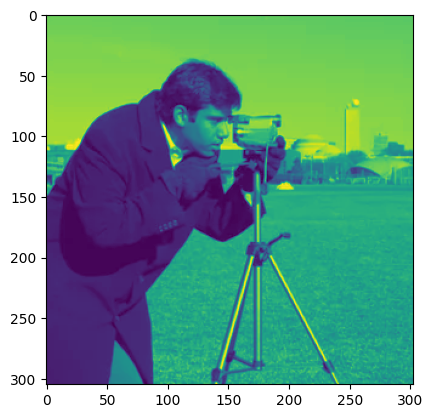

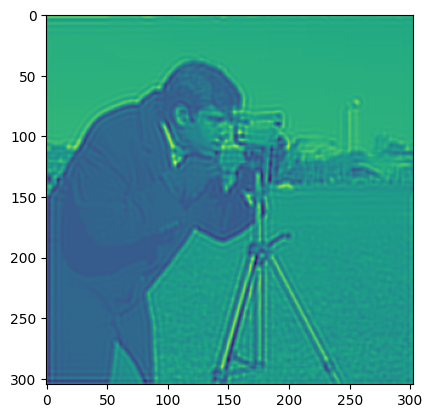

In [104]:
from skimage import color, data, restoration
from scipy.signal import convolve2d
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

image_path = r'C:\Users\User\Downloads\image1.png'
blurred_image = cv2.imread("images/img.png", cv2.IMREAD_GRAYSCALE) / 255
# psf = np.ones((5, 5)) / 25
size = 5
# K(x,y) = 1/d_p * math.exp(-x/d_p)
# kernel = np.exp(-np.linspace(-d_p, d_p, size) ** 2 / (2 * d_p ** 2))
kernel = 1/d_p * np.exp(-np.arange(1,size+1)/d_p)
# kernel = np.outer(kernel, kernel)  # Create a 2D Gaussian kernel
psf = np.full((size, size), kernel)
print(kernel)
# psf = np.full((1, 250), 1/d_p *math.exp(-1/d_p))
# img = convolve2d(blurred_image, psf, 'same')
# rng = np.random.default_rng()
# img += 0.1 * img.std() * rng.standard_normal(img.shape)
deconvolved_img = restoration.wiener(blurred_image, psf, 0.1, clip= False)
print(d_p,blurred_image, deconvolved_img)

plt.imshow(blurred_image)
plt.show()
plt.imshow( deconvolved_img)
plt.show()

[0.09048374 0.08187308 0.07408182 0.067032   0.06065307]


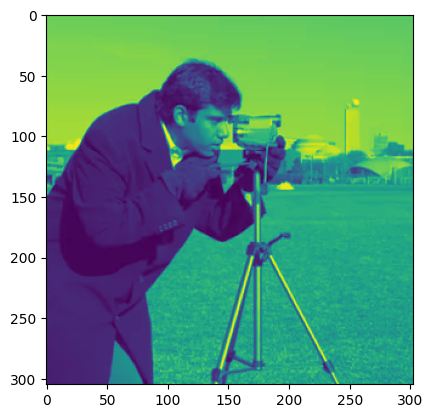

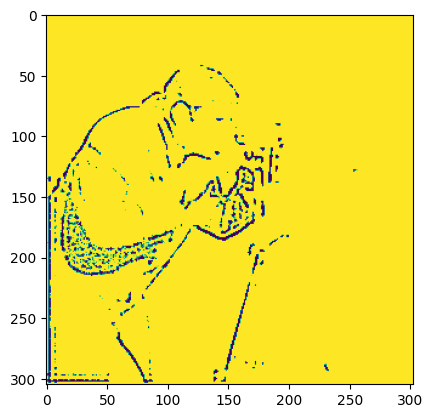

In [105]:
from skimage import color, data, restoration
blurred_image = cv2.imread("images/img.png", cv2.IMREAD_GRAYSCALE)
from scipy.signal import convolve2d
psf = np.ones((5, 5)) / 25
size = 5
# K(x,y) = 1/d_p * math.exp(-x/d_p)
# kernel = np.exp(-np.linspace(-d_p, d_p, size) ** 2 / (2 * d_p ** 2))
kernel = 1/d_p * np.exp(-np.arange(1,size+1)/d_p)
# kernel = np.outer(kernel, kernel)  # Create a 2D Gaussian kernel
psf = np.full((size, size), kernel)
print(kernel)
# img = convolve2d(blurred_image, psf, 'same')
# rng = np.random.default_rng()
# img += 0.1 * img.std() * rng.standard_normal(img.shape)
deconvolved_img, info = restoration.unsupervised_wiener(blurred_image, psf)
plt.imshow(blurred_image)
plt.show()
plt.imshow( deconvolved_img)
plt.show()

In [50]:
image_path = r'images/img.png'
blurred_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

F = np.fft.fft2(blurred_image)
image_fft_shifted = np.fft.fftshift(F)

magnitude = np.abs(image_fft_shifted)
phase = np.angle(image_fft_shifted)
cv2.imshow('Deblurred Image', blurred_image)
cv2.waitKey(0)
cv2.imshow('Deblurred Image', magnitude)
cv2.waitKey(0)
cv2.imshow('Deblurred Image', phase)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [54]:
# hyperparameters
a = 10 # horizontal motion
b = 0  # vertical motion
T = 1  # exposure time (best value is 1)
def motion_transform(image, a, b, T):
    """
        Obtains Motion Blur Transform
        Inputs:
            image - image to get motion blurr transform
            a - horizontal blur factor
            b - vertical blur factor
            T - exposure time
        Outputs:
            H - Motion Blur Transform in Fourier Domain
    """
    img_rows, img_cols = image.shape

    # get spatial Frequencies in range [-0.5, 0.5]
    u = np.fft.fftfreq(img_cols)[None, :]
    v = np.fft.fftfreq(img_rows)[:, None]
    c = np.pi*(u*a + v*b)
    print(c)
    c[c == 0] = 1
    H = T/c * np.sin(c) * np.exp(-1j*c)
      # account for div by zero

    return H.reshape((img_rows, img_cols))

blurred_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# get motion blur transform in Frequency Domain
H = motion_transform(blurred_image, a, b, T)

    # Compute the magnitude and phase
magnitude = np.abs(H)
phase = np.angle(H)
cv2.imshow('Deblurred Image', blurred_image)
cv2.waitKey(0)
cv2.imshow('Deblurred Image', magnitude)
cv2.waitKey(0)
cv2.imshow('Deblurred Image', phase)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 0.          0.10368293  0.20736585 ... -0.31104878 -0.20736585
  -0.10368293]
 [ 0.          0.10368293  0.20736585 ... -0.31104878 -0.20736585
  -0.10368293]
 [ 0.          0.10368293  0.20736585 ... -0.31104878 -0.20736585
  -0.10368293]
 ...
 [ 0.          0.10368293  0.20736585 ... -0.31104878 -0.20736585
  -0.10368293]
 [ 0.          0.10368293  0.20736585 ... -0.31104878 -0.20736585
  -0.10368293]
 [ 0.          0.10368293  0.20736585 ... -0.31104878 -0.20736585
  -0.10368293]]


In [56]:
F = np.fft.fft2(blurred_image)

G = F*H
g = np.fft.ifft2(G)
new_blurred_image = np.abs(g)
cv2.imshow('Deblurred Image', new_blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [72]:
def motion_blur(image, a, b, T=1):
    """ Obtains motion blurred image
        Inputs:
            image - original image
            a - horizontal motion factor (0-0.2)
            b - vertical motion factor (0-0.2)
        Outputs:
            blurred_image - blurred image
    """
    if (a == 0) and (b == 0):
        return image

    # compute FFT of image
    F = np.fft.fft2(image)

    # compute motion blurr function H in Frequency Domain
    H = motion_transform(image, a, b, T)

    # perform motion blurring in Frequency Domain
    G = F*H

    # get blurred image
    return np.abs(np.fft.ifft2(G))


image_path = r'images/img.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)# get blurred image
blurred_image = motion_blur(image/255, a=1, b=0, T=1)
cv2.imshow('Deblurred Image', image)
cv2.waitKey(0)
cv2.imshow('Deblurred Image', (blurred_image*255).astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()
print(image, (blurred_image*255).astype(np.uint8))


[[ 0.          0.01036829  0.02073659 ... -0.03110488 -0.02073659
  -0.01036829]
 [ 0.          0.01036829  0.02073659 ... -0.03110488 -0.02073659
  -0.01036829]
 [ 0.          0.01036829  0.02073659 ... -0.03110488 -0.02073659
  -0.01036829]
 ...
 [ 0.          0.01036829  0.02073659 ... -0.03110488 -0.02073659
  -0.01036829]
 [ 0.          0.01036829  0.02073659 ... -0.03110488 -0.02073659
  -0.01036829]
 [ 0.          0.01036829  0.02073659 ... -0.03110488 -0.02073659
  -0.01036829]]
[[221 220 220 ... 211 211 211]
 [191 192 192 ... 184 184 185]
 [196 197 197 ... 189 189 191]
 ...
 [ 22  22  22 ... 135 115 141]
 [ 23  23  22 ... 147 148 135]
 [ 23  23  22 ... 154 133 109]] [[181 184 183 ... 178 179 178]
 [158 160 160 ... 156 156 156]
 [163 164 164 ... 160 160 161]
 ...
 [ 86 100  91 ... 120  98 111]
 [ 86 100  93 ... 117 115 121]
 [ 86  99  95 ... 121 114 105]]


dict_keys(['__header__', '__version__', '__globals__', 'gt', 'rec', 'gain', 'offset', 'snr', 'psnr', 'ssim', 'minval', 'maxval'])


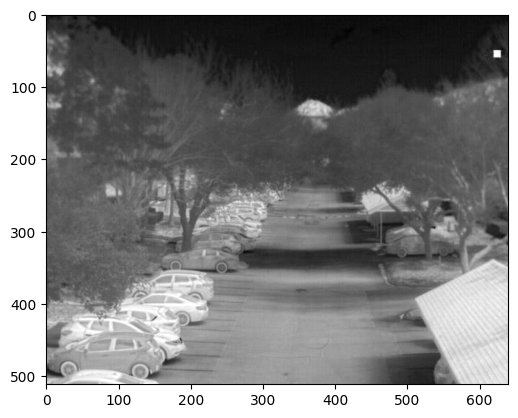

In [108]:
# read a .mat file and show image
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
mat = scipy.io.loadmat(r'C:\Users\User\PycharmProjects\PythonProject\DeepIR\test1_sim_dip_8x_20.mat')
print(mat.keys())
image = mat['gt']
plt.imshow(image, cmap='gray')
plt.show()

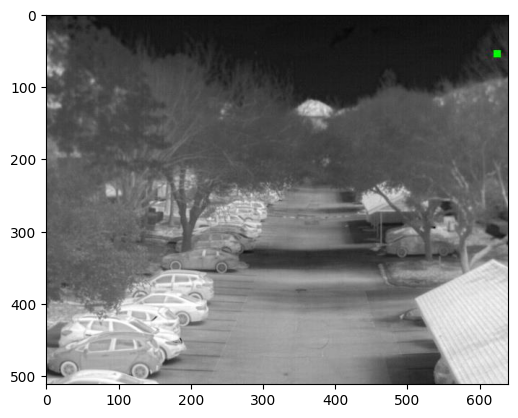

In [115]:
image = cv2.imread(r'C:\Users\User\PycharmProjects\PythonProject\DeepIR\data\test1.png')
plt.imshow( image)
plt.show()